In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Linear regression

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of ther regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [3]:
lw = Table.read_table('http://inferentialthinking.com/notebooks/little_women.csv').move_to_start('Periods')
lw.show(3)

Periods,Characters
189,21759
188,22148
231,20558


In [4]:
shotput = Table.read_table('http://inferentialthinking.com/notebooks/shotput.csv')
shotput.show(3)

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4


## Residuals

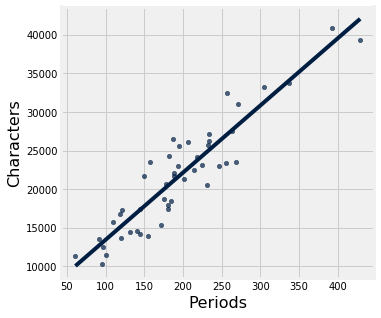

In [5]:
lw.scatter(0, 1, fit_line=True)

In [6]:
y = lw.column(1)
fitted = fit(lw, 0, 1)
residuals = y - fitted

In [7]:
sum(residuals)

-3.637978807091713e-11

In [8]:
np.mean(residuals**2)**0.5

2701.690785311856

## Residual Plot

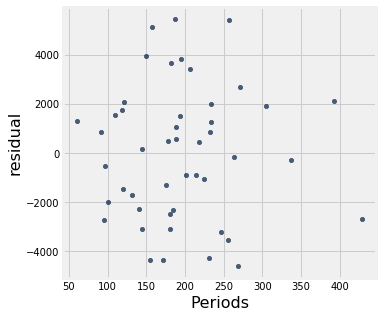

In [9]:
lw.with_column('residual', residuals).scatter(0, 2)

In [10]:
def plot_residuals(t):
    t.scatter(0, 1, fit_line=True)
    y = t.column(1)
    fitted = fit(t, 0, 1)
    residuals = y - fitted
    print('Sum of residuals:', sum(residuals))
    print('RMSE:', np.mean(residuals**2)**0.5)
    t.with_column('Residual', residuals).scatter(0, 2)

Sum of residuals: 5.50670620214e-14
RMSE: 1.21944448451


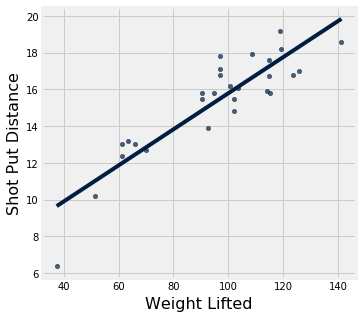

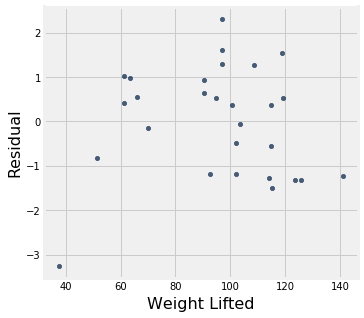

In [11]:
plot_residuals(shotput)

## Dugong

In [12]:
dugong = Table.read_table('http://www.statsci.org/data/oz/dugongs.txt')
dugong.show(3)

Age,Length
1,1.8
1.5,1.85
1.5,1.87


Sum of residuals: -7.77156117238e-15
RMSE: 0.150468392782


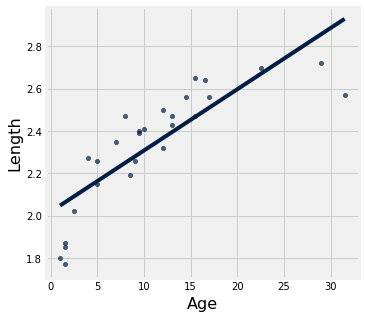

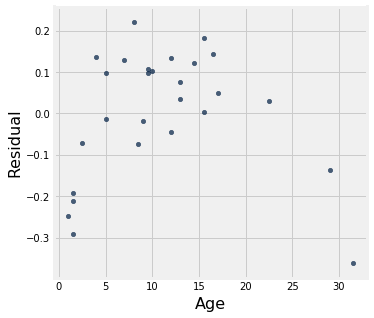

In [13]:
plot_residuals(dugong)

In [14]:
us_women = Table.read_table('http://inferentialthinking.com/notebooks/us_women.csv')
us_women.show(3)

height,ave weight
58,115
59,117
60,120


In [15]:
correlation(us_women, 0, 1)

0.99549476778421608

Sum of residuals: 2.84217094304e-14
RMSE: 1.41970262927


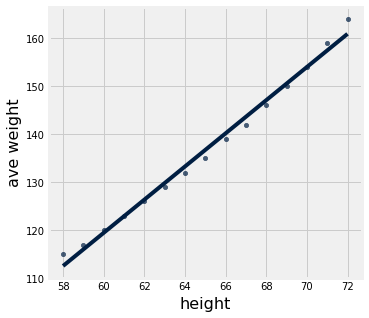

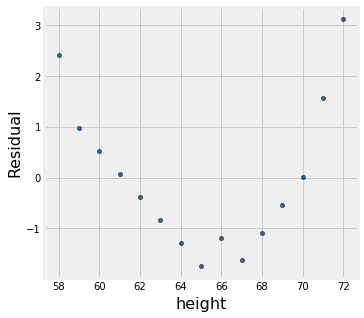

In [16]:
plot_residuals(us_women)

## Variance

In [21]:
def r_scatter(r):
    """
    Generate a scatter plot with a correlation approximately r
    and print variance ratios
    """
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 2000)
    z = np.random.normal(0, np.sqrt(1-r**2), 2000)
    y = r*x + z
    
    fitted = r*x
    resid = y - fitted
    print('Var resid / var y      =', np.round(np.var(resid) / np.var(y), 2))
    print('Var fitted / var y     =', np.round(np.var(fitted) / np.var(y), 2))
    print('Var y                  =', np.round(np.var(y), 1))
    print('Var fitted + var resid =', np.round(np.var(fitted) + np.var(resid), 1))
    
    plt.scatter(x, y, c='gray')
    plt.scatter(x, fitted, c='dodgerblue')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()

In [22]:
_ = interact(r_scatter, r=(-1, 1, 0.1))

## Regression Model

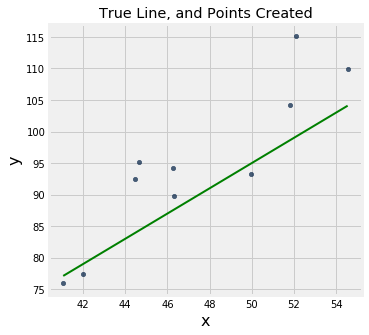

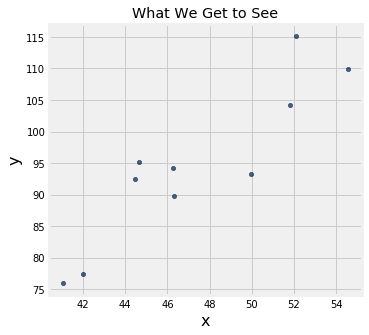

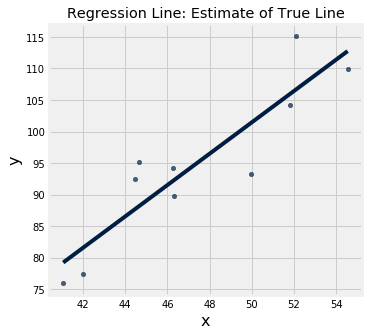

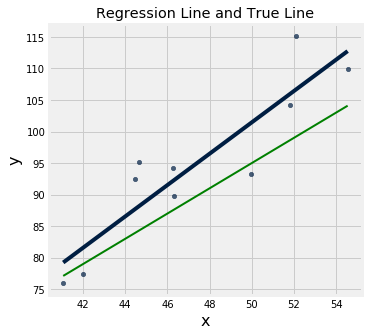

In [23]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter(0, 1)
    plt.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plt.title('True Line, and Points Created')

    sample.scatter(0, 1)
    plt.title('What We Get to See')

    sample.scatter(0, 1, fit_line=True)
    plt.title('Regression Line: Estimate of True Line')

    sample.scatter(0, 1, fit_line=True)
    plt.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plt.title("Regression Line and True Line")
    
draw_and_compare(2, -5, 10)

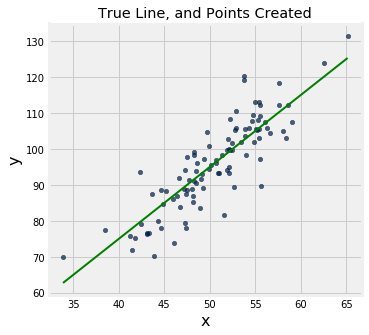

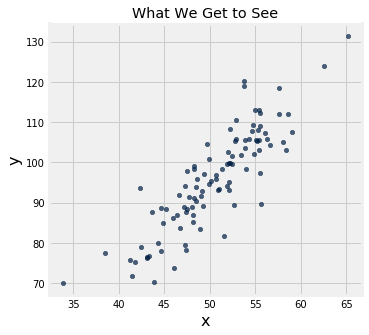

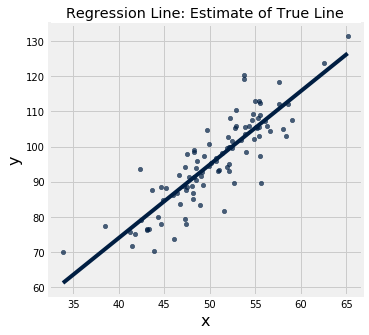

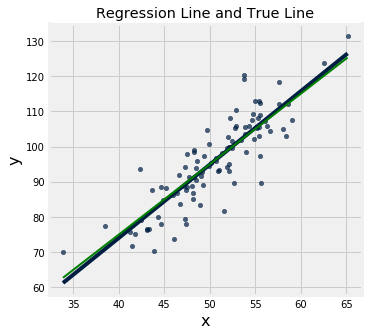

In [24]:
draw_and_compare(2, -5, 100)

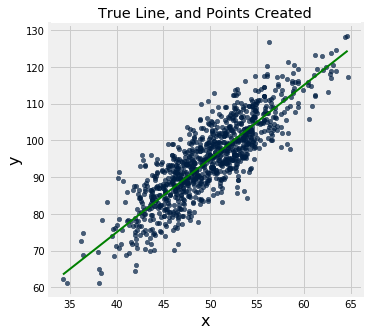

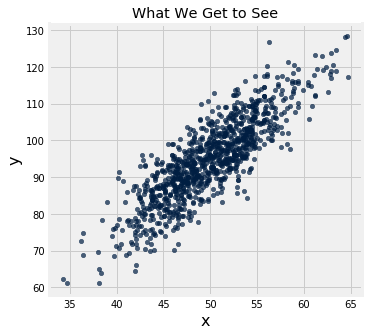

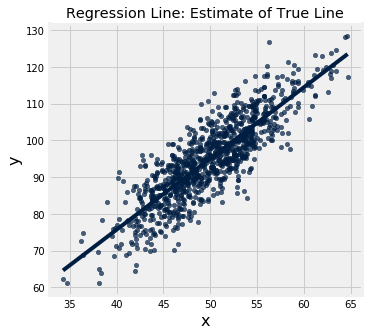

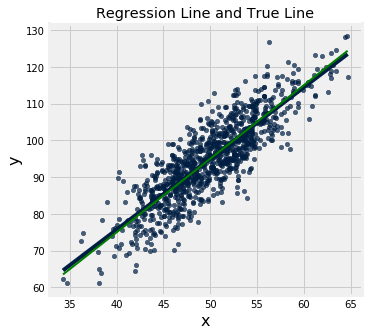

In [25]:
draw_and_compare(2, -5, 1000)